# Paiu Teofil 333CB Tema 2 IA

Tema are ca scop analizarea a doua seturi de date si crearea a doua modele care pot sa clasifice o intrare din seturile de date dupa un atribut.

\\
Cele doua modele se vor baza pe Arbori de Decizie si Multi-Layered Perceptron.




---
\\

Instalare si importare biblioteci necesare:

In [55]:
!pip install matplotlib scikit-learn pandas numpy scipy sklearn

In [10]:
# importare biblioteci
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Analiza dataset 1 - Predicție AVC

In [2]:
# vizualizare date continue
df_1 = pd.read_csv("./AVC_full.csv")

# atribute numerice continue
numeric_feature = ["mean_blood_sugar_level",  "body_mass_indicator",  "years_old", "analysis_results", "biological_age_index"]
# atribute discrete
discret_feature = ["cardiovascular_issues", "job_category", "sex", "tobacco_usage", "high_blood_pressure", "married", "living_area","chaotic_sleep", "cerebrovascular_accident"]

for category in discret_feature:
  df_1[category] = df_1[category].astype('category')

In [3]:
# calculeaza statistica atributelor continue
stats = df_1[numeric_feature].describe(percentiles=[.25, .5, .75]).T
stats['count'] = stats['count'].astype(int)
stats = stats.rename(columns={
    'count': 'Numarul de exemplare',
    'mean': 'Valoare medie',
    'std': 'Deviatia Standart',
    'min': 'Valoare minima',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%',
    'max': 'Valoare maxima'
})
print("Statistica pentru atributele numerice")
stats

Statistica pentru atributele numerice


Numarul de exemplare  Valoare medie  \
mean_blood_sugar_level                  5110     106.147677   
body_mass_indicator                     4909      28.893237   
years_old                               5110      46.568665   
analysis_results                        4599     323.523446   
biological_age_index                    5110     134.784256   

                        Deviatia Standart  Valoare minima         25%  \
mean_blood_sugar_level          45.283560       55.120000   77.245000   
body_mass_indicator              7.854067       10.300000   23.500000   
years_old                       26.593912        0.080000   26.000000   
analysis_results               101.577442      104.829714  254.646209   
biological_age_index            50.399352      -15.109456   96.710581   

                               50%         75%  Valoare maxima  
mean_blood_sugar_level   91.885000  114.090000      271.740000  
body_mass_indicator      28.100000   33.100000       97.600000  
years_old                47.000000   63.750000      134.000000  
analysis_results        301.031628  362.822769      756.807975  
biological_age_index    136.374631  172.507322      266.986321

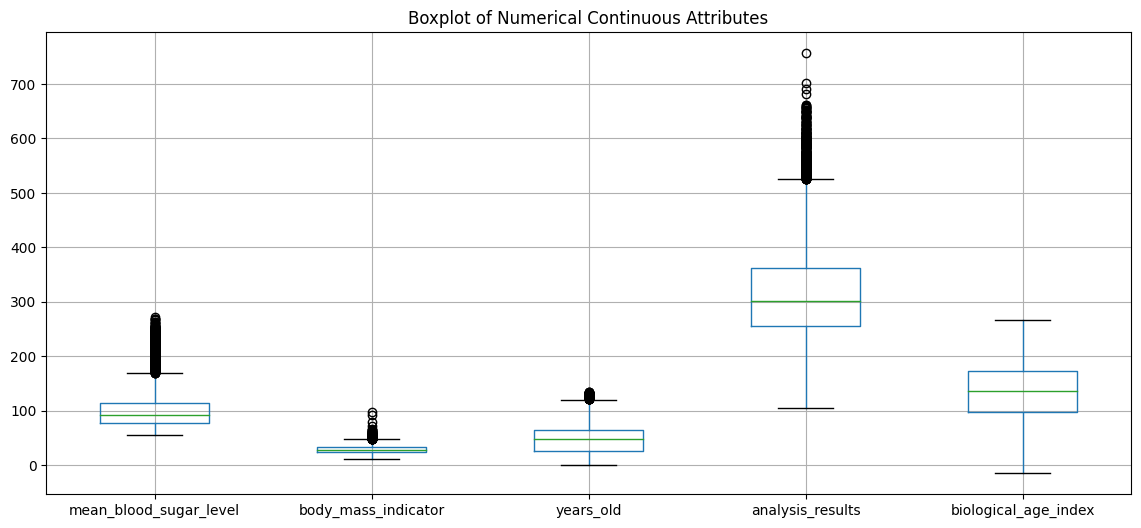

In [4]:
# vizualizare valori continue
df_1[numeric_feature].boxplot(figsize=(14, 6))
plt.title('Boxplot of Numerical Continuous Attributes')
plt.show()

In [5]:
# calculeaza statistica valori categorice
categorical_stats = df_1[discret_feature].describe().T[['count', "unique"]]
categorical_stats = categorical_stats.rename(columns={
    'count': 'Nr. Exemplare',
    'unique': 'Nr. Val. Unice'
})
print("Statistics for Categorical/Ordinal Attributes:")
print(categorical_stats)

Statistics for Categorical/Ordinal Attributes:
                         Nr. Exemplare Nr. Val. Unice
cardiovascular_issues             5110              2
job_category                      5110              5
sex                               5110              2
tobacco_usage                     5110              4
high_blood_pressure               5110              2
married                           4599              2
living_area                       5110              2
chaotic_sleep                     5110              2
cerebrovascular_accident          5110              2


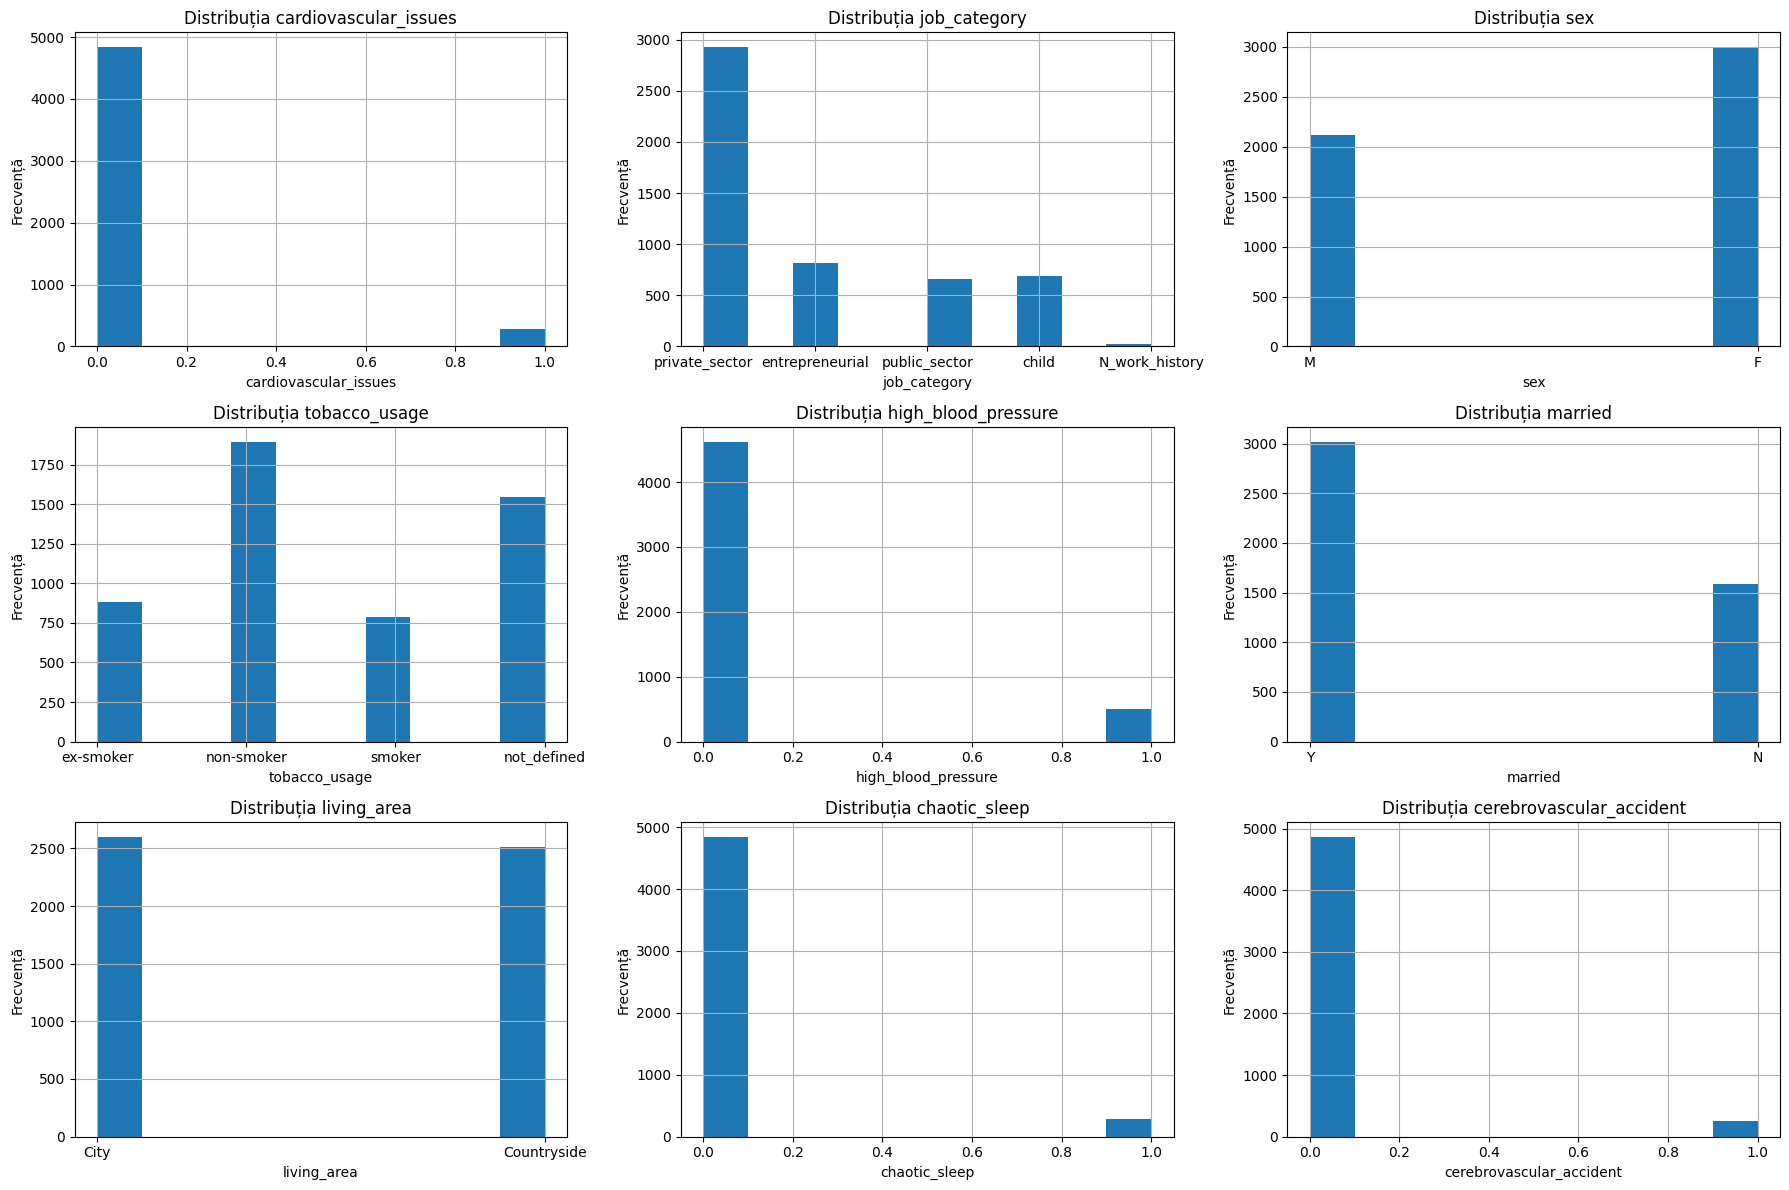

In [6]:
# Generarea histogramelor pentru atributele categorice/ordinare
plt.figure(figsize=(18, 12))
for i, col in enumerate(discret_feature, 1):
    plt.subplot(3, 3, i)
    df_1[col].hist()
    plt.title(f'Distribuția {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')

plt.tight_layout()
plt.show()

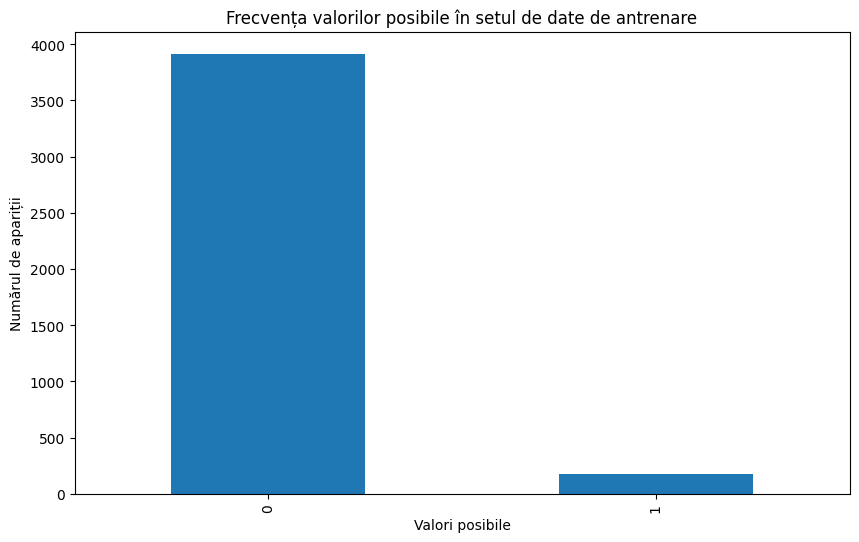

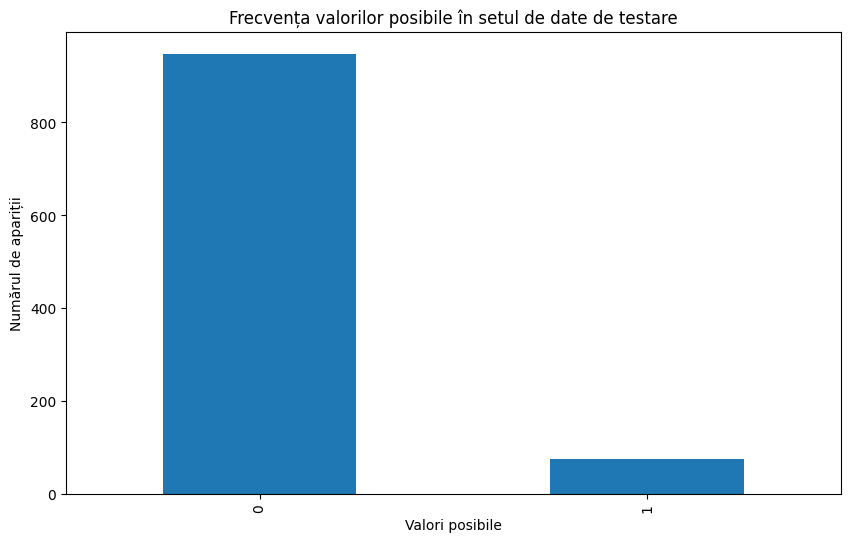

In [7]:
test_df_1 = pd.read_csv("./AVC_test.csv")
train_df_1 = pd.read_csv("./AVC_train.csv")

label_counts = train_df_1["cerebrovascular_accident"].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind="bar")
plt.title('Frecvența valorilor posibile în setul de date de antrenare')
plt.xlabel('Valori posibile')
plt.ylabel('Numărul de apariții')
plt.show()

label_counts = test_df_1["cerebrovascular_accident"].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind="bar")
plt.title('Frecvența valorilor posibile în setul de date de testare')
plt.xlabel('Valori posibile')
plt.ylabel('Numărul de apariții')
plt.show()

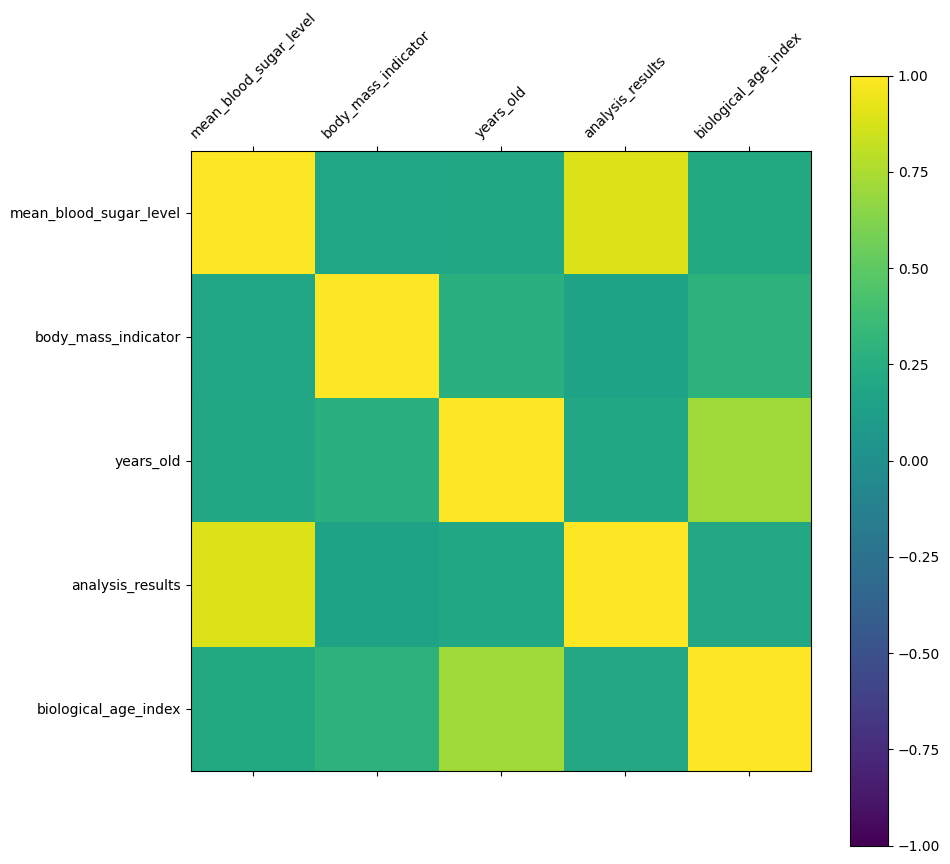

In [54]:
# Analiza coleratie valori numerice
data = df_1[numeric_feature]

# calculate correlation
correlations = data.corr()

# create a new figure
fig = plt.figure(figsize=(10,10))

# 111: 1x1 grid, first subplot
ax = fig.add_subplot(111)

# normalize data using vmin, vmax
cax = ax.matshow(correlations, vmin=-1, vmax=1)

# add a colorbar to a plot.
fig.colorbar(cax)

# define ticks
ticks = np.arange(0,5,1)

# set x and y tick marks
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# set x and y tick labels
ax.set_xticklabels(numeric_feature)
ax.set_yticklabels(numeric_feature)
plt.xticks(rotation=45)

# draw a matrix using the correlations data
plt.show()


Tabelul de contingență pentru statisticile Chi-Pătrat:


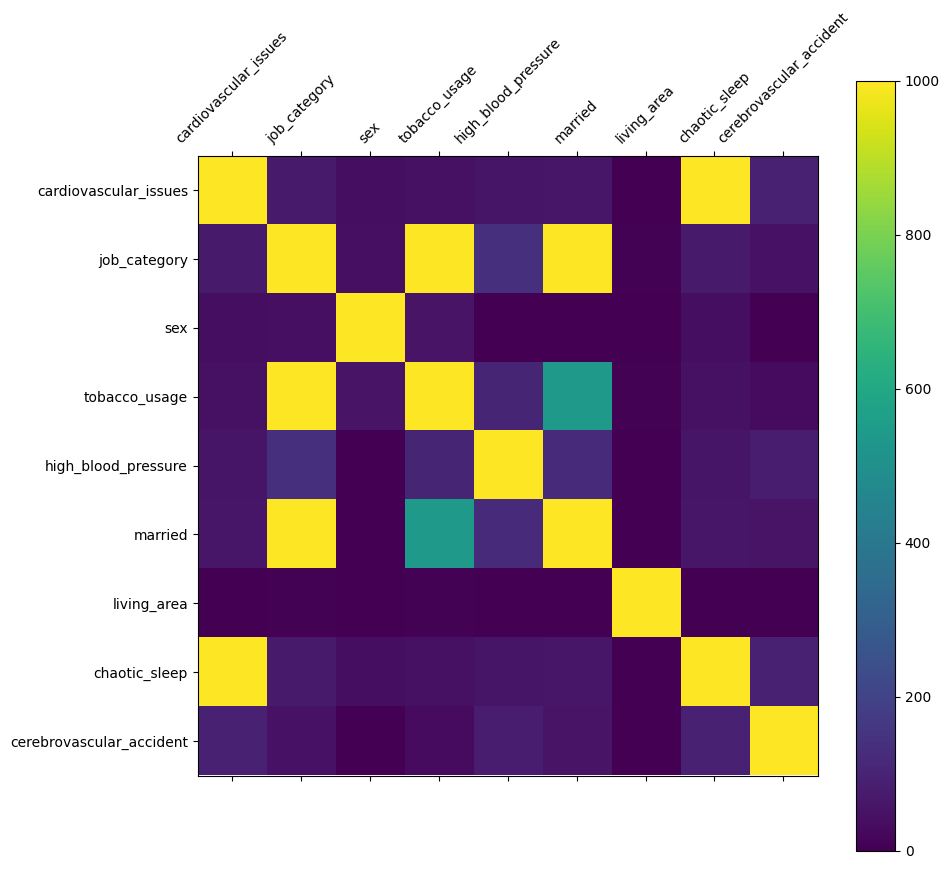

cardiovascular_issues  job_category          sex  \
cardiovascular_issues               5090.447152     70.702510    36.692270   
job_category                          70.702510  20440.000000    42.249510   
sex                                   36.692270     42.249510  5105.879150   
tobacco_usage                         44.656543   1389.106568    52.774217   
high_blood_pressure                   58.336664    135.199672     2.141921   
married                               59.115215   1460.275039     2.883913   
living_area                            0.025324      4.653309     0.180451   
chaotic_sleep                       5090.447152     70.702510    36.692270   
cerebrovascular_accident              90.259561     49.163512     0.335593   

                          tobacco_usage  high_blood_pressure      married  \
cardiovascular_issues         44.656543            58.336664    59.115215   
job_category                1389.106568           135.199672  1460.275039   
sex                           52.774217             2.141921     2.883913   
tobacco_usage              15330.000000           103.874201   535.559565   
high_blood_pressure          103.874201          5098.637300   117.572802   
married                      535.559565           117.572802  4594.573609   
living_area                    5.400995             0.268856     0.000243   
chaotic_sleep                 44.656543            58.336664    59.115215   
cerebrovascular_accident      29.147269            81.605368    51.238355   

                          living_area  chaotic_sleep  cerebrovascular_accident  
cardiovascular_issues        0.025324    5090.447152                 90.259561  
job_category                 4.653309      70.702510                 49.163512  
sex                          0.180451      36.692270                  0.335593  
tobacco_usage                5.400995      44.656543                 29.147269  
high_blood_pressure          0.268856      58.336664                 81.605368  
married                      0.000243      59.115215                 51.238355  
living_area               5105.999753       0.025324                  1.081637  
chaotic_sleep                0.025324    5090.447152                 90.259561  
cerebrovascular_accident     1.081637      90.259561               5088.449457

In [65]:
# Analiza atributelor categorice

contingency_table = pd.DataFrame(index=discret_feature, columns=discret_feature, dtype=int)

for col1 in discret_feature:
    for col2 in discret_feature:
        cross_tab = pd.crosstab(df_1[col1], df_1[col2])
        chi2, _, _, _ = chi2_contingency(cross_tab)
        contingency_table.loc[col1, col2] = chi2

# Afișează statisticile Chi-Pătrat
print("Tabelul de contingență pentru statisticile Chi-Pătrat:")

# create a new figure
fig = plt.figure(figsize=(10,10))

# 111: 1x1 grid, first subplot
ax = fig.add_subplot(111)

# normalize data using vmin, vmax
cax = ax.matshow(contingency_table, vmin=0, vmax=1000)

# add a colorbar to a plot.
fig.colorbar(cax)

# define ticks
ticks = np.arange(0,9,1)

# set x and y tick marks
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# set x and y tick labels
ax.set_xticklabels(discret_feature)
ax.set_yticklabels(discret_feature)
plt.xticks(rotation=45)

# draw a matrix using the correlations data
plt.show()
contingency_table

## Analiza dataset 2 - Risc

In [39]:
# vizualizare date continue
df_2 = pd.read_csv("./credit_risk_full.csv")

# atribute numerice continue
numeric_feature_2 = ["applicant_age",  "applicant_income",  "job_tenure_years", "loan_amount", "loan_rate", "loan_income_ratio", "credit_history_length_years", "credit_history_length_months"]
# atribute discrete
discret_feature_2 = ["residential_status", "loan_purpose", "loan_rating", "credit_history_default_status", "stability_rating", "loan_approval_status"]

for category in discret_feature_2:
  df_2[category] = df_2[category].astype('category')

In [32]:
# calculeaza statistica atributelor continue
stats = df_2[numeric_feature_2].describe(percentiles=[.25, .5, .75]).T
stats['count'] = stats['count'].astype(int)
stats = stats.rename(columns={
    'count': 'Numarul de exemplare',
    'mean': 'Valoare medie',
    'std': 'Deviatia Standart',
    'min': 'Valoare minima',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%',
    'max': 'Valoare maxima'
})
print("Statistica pentru atributele numerice")
stats

Statistica pentru atributele numerice


Numarul de exemplare  Valoare medie  \
applicant_age                                10000      27.745100   
applicant_income                             10000   65734.211300   
job_tenure_years                              9736       4.785744   
loan_amount                                  10000    9568.037500   
loan_rate                                     9060      11.007179   
loan_income_ratio                            10000       0.170130   
credit_history_length_years                  10000       5.811100   
credit_history_length_months                 10000      75.760700   

                              Deviatia Standart  Valoare minima       25%  \
applicant_age                          6.360155           20.00     23.00   
applicant_income                   56944.387081         4200.00  38595.00   
job_tenure_years                       4.353122            0.00      2.00   
loan_amount                         6350.431581          500.00   5000.00   
loan_rate                              3.266393            5.42      7.90   
loan_income_ratio                      0.106814            0.00      0.09   
credit_history_length_years            4.050217            2.00      3.00   
credit_history_length_months          48.677362           25.00     41.00   

                                   50%       75%  Valoare maxima  
applicant_age                    26.00     30.00          123.00  
applicant_income              55000.00  78997.00      2039784.00  
job_tenure_years                  4.00      7.00          123.00  
loan_amount                    8000.00  12200.00        35000.00  
loan_rate                        10.99     13.47           23.22  
loan_income_ratio                 0.15      0.23            0.76  
credit_history_length_years       4.00      8.00           30.00  
credit_history_length_months     57.00    102.00          369.00

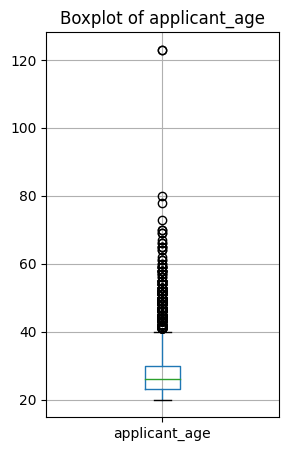

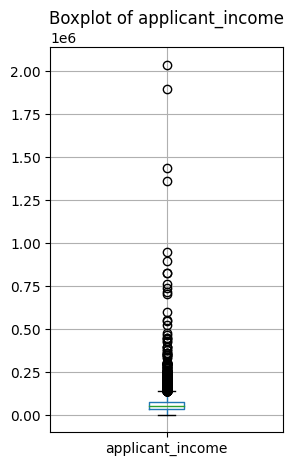

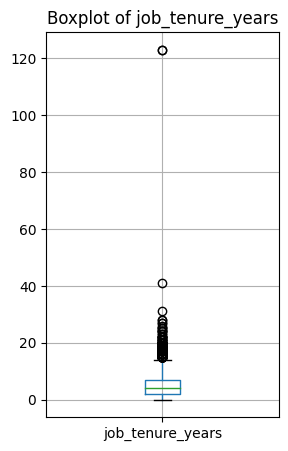

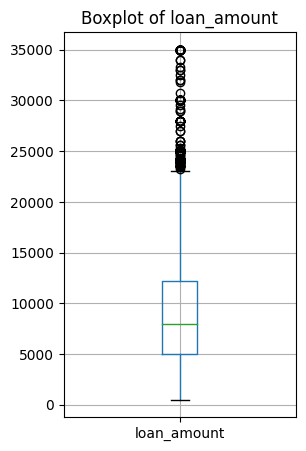

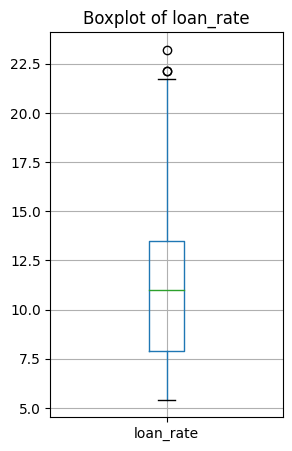

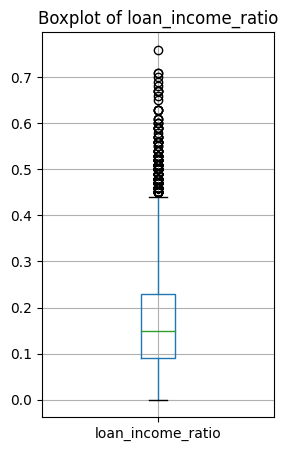

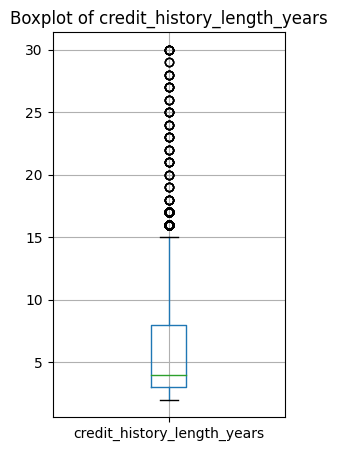

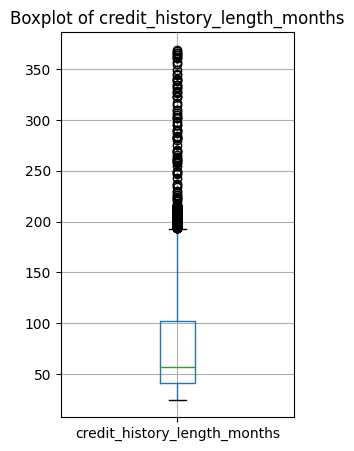

In [46]:
# vizualizare valori continue
for numeric in numeric_feature_2:
  df_2[[numeric]].boxplot(figsize=(3, 5))
  plt.title(f'Boxplot of {numeric}')
  plt.show()

In [47]:
# calculeaza statistica valori categorice
categorical_stats = df_2[discret_feature_2].describe().T[['count', "unique"]]
categorical_stats = categorical_stats.rename(columns={
    'count': 'Nr. Exemplare',
    'unique': 'Nr. Val. Unice'
})
print("Statistics for Categorical/Ordinal Attributes:")
print(categorical_stats)

Statistics for Categorical/Ordinal Attributes:
                              Nr. Exemplare Nr. Val. Unice
residential_status                    10000              4
loan_purpose                          10000              6
loan_rating                           10000              7
credit_history_default_status         10000              2
stability_rating                      10000              4
loan_approval_status                  10000              2


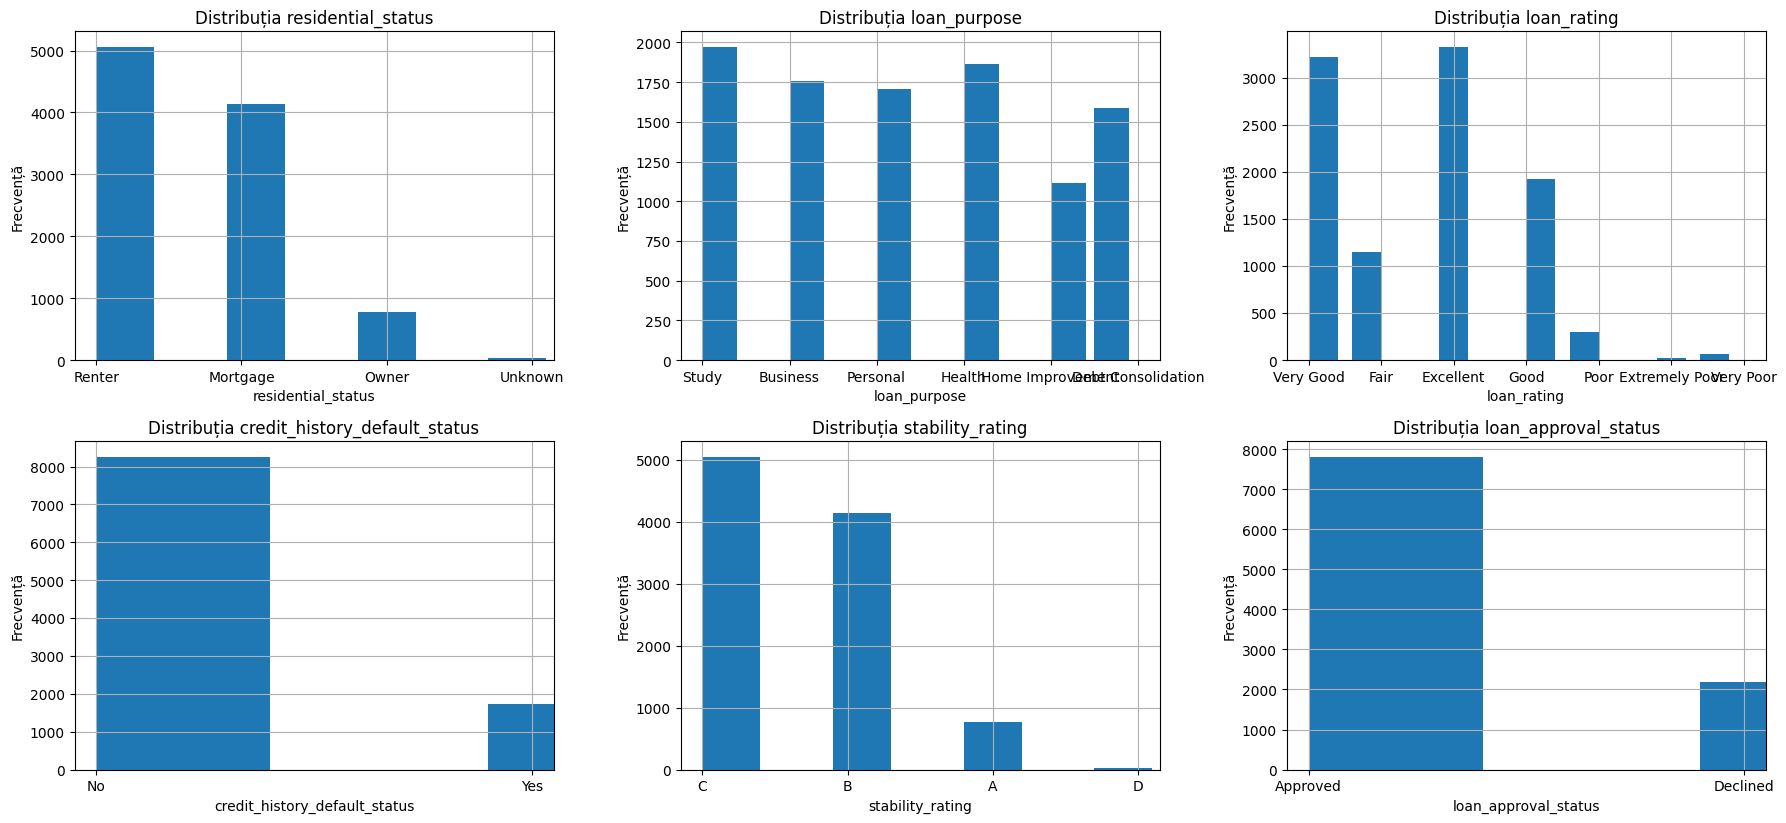

In [52]:
# Generarea histogramelor pentru atributele categorice/ordinare
plt.figure(figsize=(18, 12))
for i, col in enumerate(discret_feature_2, 1):
    plt.subplot(3, 3, i)
    df_2[col].hist(width=0.4)
    plt.title(f'Distribuția {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')

plt.tight_layout()
plt.show()

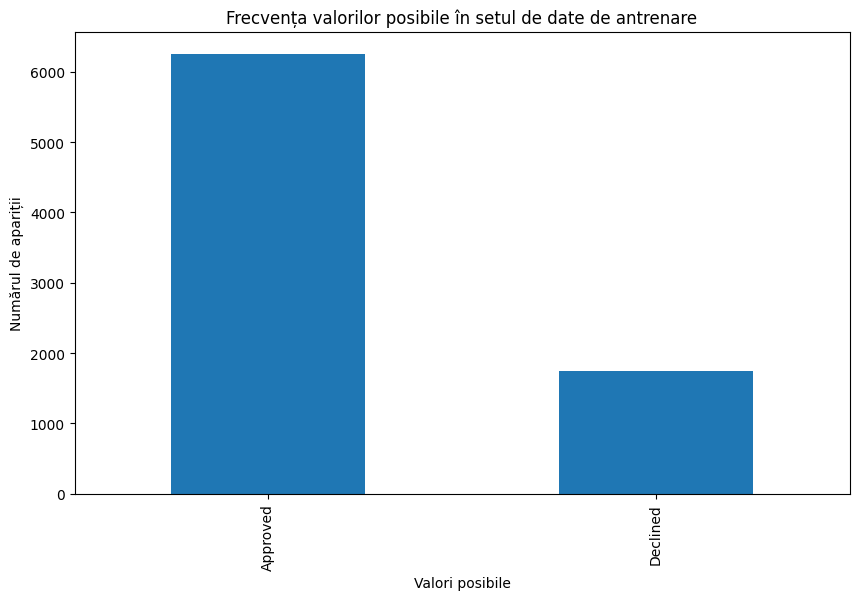

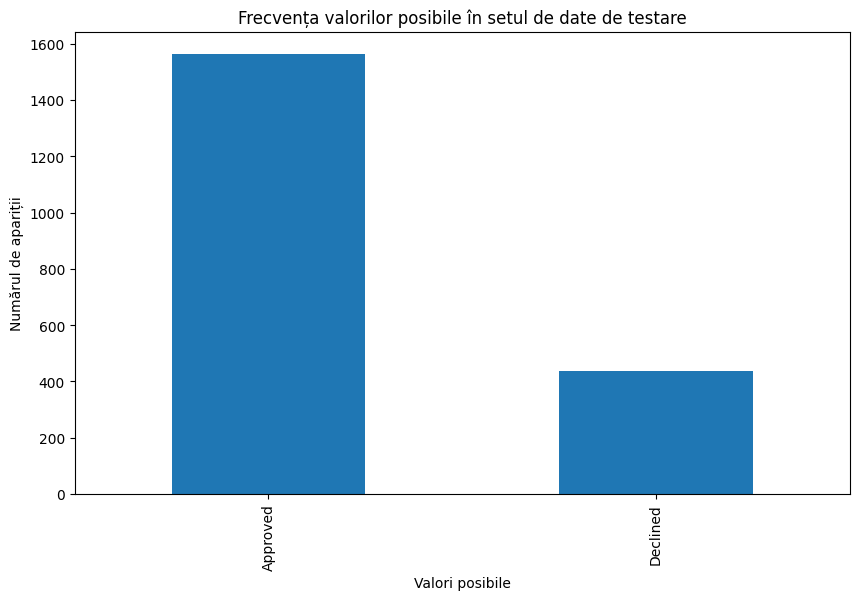

In [53]:
test_df_2 = pd.read_csv("./credit_risk_test.csv")
train_df_2 = pd.read_csv("./credit_risk_train.csv")

label_counts = train_df_2["loan_approval_status"].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind="bar")
plt.title('Frecvența valorilor posibile în setul de date de antrenare')
plt.xlabel('Valori posibile')
plt.ylabel('Numărul de apariții')
plt.show()

label_counts = test_df_2["loan_approval_status"].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind="bar")
plt.title('Frecvența valorilor posibile în setul de date de testare')
plt.xlabel('Valori posibile')
plt.ylabel('Numărul de apariții')
plt.show()

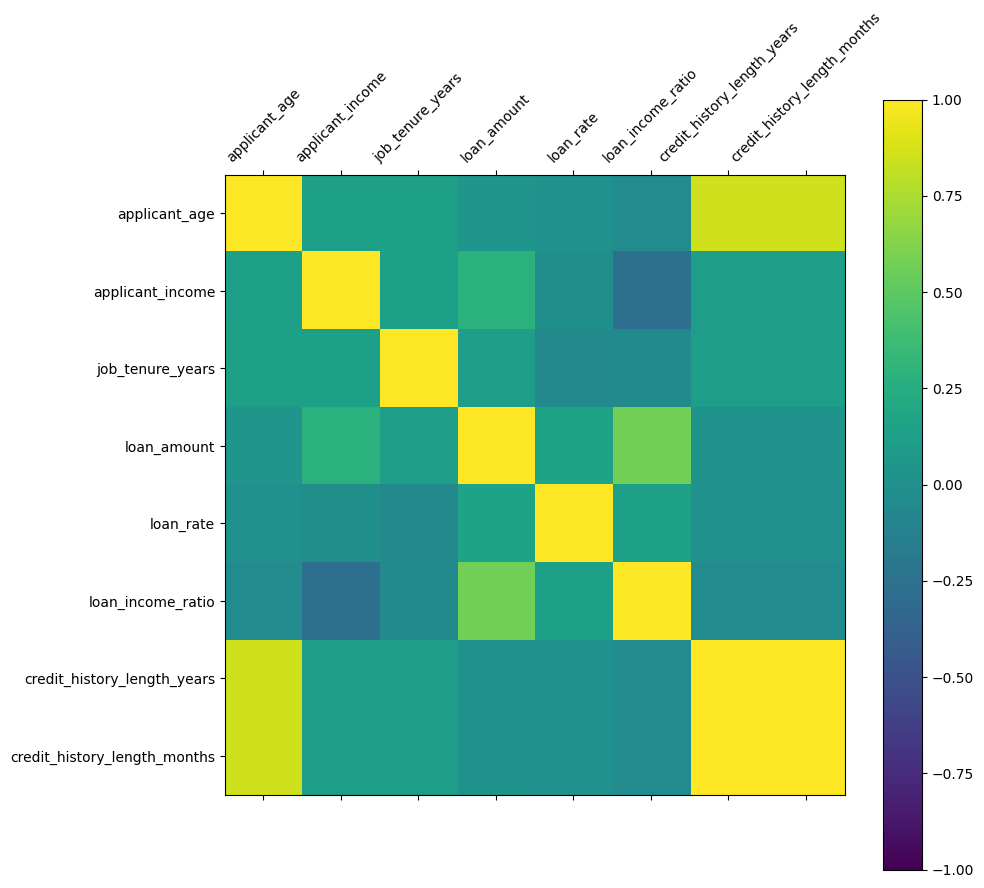

In [59]:
# Analiza coleratie valori numerice
data = df_2[numeric_feature_2]

# calculate correlation
correlations = data.corr()

# create a new figure
fig = plt.figure(figsize=(10,10))

# 111: 1x1 grid, first subplot
ax = fig.add_subplot(111)

# normalize data using vmin, vmax
cax = ax.matshow(correlations, vmin=-1, vmax=1)

# add a colorbar to a plot.
fig.colorbar(cax)

# define ticks
ticks = np.arange(0,8,1)

# set x and y tick marks
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# set x and y tick labels
ax.set_xticklabels(numeric_feature_2)
ax.set_yticklabels(numeric_feature_2)
plt.xticks(rotation=45)

# draw a matrix using the correlations data
plt.show()

Tabelul de contingență pentru statisticile Chi-Pătrat:


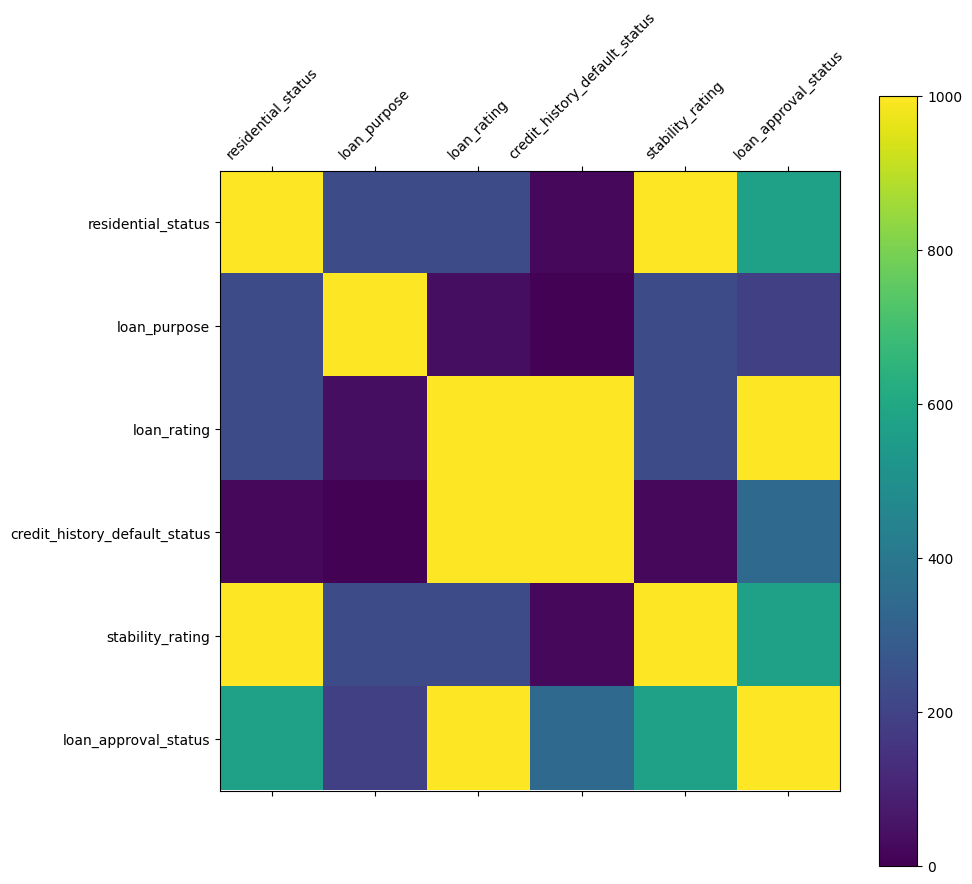

residential_status  loan_purpose   loan_rating  \
residential_status                   30000.000000    229.883314    230.183249   
loan_purpose                           229.883314  50000.000000     37.866196   
loan_rating                            230.183249     37.866196  60000.000000   
credit_history_default_status           22.348387      6.309881   3974.826613   
stability_rating                     30000.000000    229.883314    230.183249   
loan_approval_status                   570.879404    190.365543   1780.674012   

                               credit_history_default_status  \
residential_status                                 22.348387   
loan_purpose                                        6.309881   
loan_rating                                      3974.826613   
credit_history_default_status                    9993.030778   
stability_rating                                   22.348387   
loan_approval_status                              340.578766   

                               stability_rating  loan_approval_status  
residential_status                 30000.000000            570.879404  
loan_purpose                         229.883314            190.365543  
loan_rating                          230.183249           1780.674012  
credit_history_default_status         22.348387            340.578766  
stability_rating                   30000.000000            570.879404  
loan_approval_status                 570.879404           9994.138808

In [62]:
# Analiza atributelor categorice

contingency_table = pd.DataFrame(index=discret_feature_2, columns=discret_feature_2, dtype=int)

for col1 in discret_feature_2:
    for col2 in discret_feature_2:
        cross_tab = pd.crosstab(df_2[col1], df_2[col2])
        chi2, _, _, _ = chi2_contingency(cross_tab)
        contingency_table.loc[col1, col2] = chi2

# Afișează statisticile Chi-Pătrat
print("Tabelul de contingență pentru statisticile Chi-Pătrat:")

# create a new figure
fig = plt.figure(figsize=(10,10))

# 111: 1x1 grid, first subplot
ax = fig.add_subplot(111)

# normalize data using vmin, vmax
cax = ax.matshow(contingency_table, vmin=0, vmax=1000)

# add a colorbar to a plot.
fig.colorbar(cax)

# define ticks
ticks = np.arange(0,6,1)

# set x and y tick marks
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# set x and y tick labels
ax.set_xticklabels(discret_feature_2)
ax.set_yticklabels(discret_feature_2)
plt.xticks(rotation=45)

# draw a matrix using the correlations data
plt.show()
contingency_table

## Preprocesarea - AVC

In [102]:
# Definirea imputatorului simplu pentru caracteristici continue
simple_imputer = SimpleImputer(strategy='mean')
# si categorice
simple_imputer_cat = SimpleImputer(strategy='most_frequent')
# Inițializarea scalatorului
scaler = StandardScaler()

threshold = 5


for column in numeric_feature:
    mean = test_df_1[column].mean()
    std = test_df_1[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identifică valorile extreme și înlocuiește-le cu NaN
    test_df_1[column] = np.where((test_df_1[column] < lower_bound) | (test_df_1[column] > upper_bound), np.nan, test_df_1[column])

for column in numeric_feature:
    mean = train_df_1[column].mean()
    std = train_df_1[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identifică valorile extreme și înlocuiește-le cu NaN
    train_df_1[column] = np.where((train_df_1[column] < lower_bound) | (train_df_1[column] > upper_bound), np.nan, train_df_1[column])



test_df_1[numeric_feature] = simple_imputer.fit_transform(test_df_1[numeric_feature])
test_df_1[discret_feature] = simple_imputer_cat.fit_transform(test_df_1[discret_feature])
test_df_1[numeric_feature] = scaler.fit_transform(test_df_1[numeric_feature])

train_df_1[numeric_feature] = simple_imputer.fit_transform(train_df_1[numeric_feature])
train_df_1[discret_feature] = simple_imputer_cat.fit_transform(train_df_1[discret_feature])
train_df_1[numeric_feature] = scaler.fit_transform(train_df_1[numeric_feature])


## Preprocesarea - credit_risk


In [81]:
# Definirea imputatorului simplu pentru caracteristici continue
simple_imputer = SimpleImputer(strategy='mean')
# si categorice
simple_imputer_cat = SimpleImputer(strategy='most_frequent')
# Inițializarea scalatorului
scaler = StandardScaler()

threshold = 5

for column in numeric_feature_2:
    mean = test_df_2[column].mean()
    std = test_df_2[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identifică valorile extreme și înlocuiește-le cu NaN
    test_df_2[column] = np.where((test_df_2[column] < lower_bound) | (test_df_2[column] > upper_bound), np.nan, test_df_2[column])

for column in numeric_feature_2:
    mean = train_df_2[column].mean()
    std = train_df_2[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identifică valorile extreme și înlocuiește-le cu NaN
    train_df_2[column] = np.where((train_df_2[column] < lower_bound) | (train_df_2[column] > upper_bound), np.nan, train_df_2[column])


test_df_2[numeric_feature_2] = simple_imputer.fit_transform(test_df_2[numeric_feature_2])
test_df_2[discret_feature_2] = simple_imputer_cat.fit_transform(test_df_2[discret_feature_2])
test_df_2[numeric_feature_2] = scaler.fit_transform(test_df_2[numeric_feature_2])

train_df_2[numeric_feature_2] = simple_imputer.fit_transform(train_df_2[numeric_feature_2])
train_df_2[discret_feature_2] = simple_imputer_cat.fit_transform(train_df_2[discret_feature_2])
train_df_2[numeric_feature_2] = scaler.fit_transform(train_df_2[numeric_feature_2])

## Antrenare Model - AVC